[*********************100%***********************]  1 of 1 completed


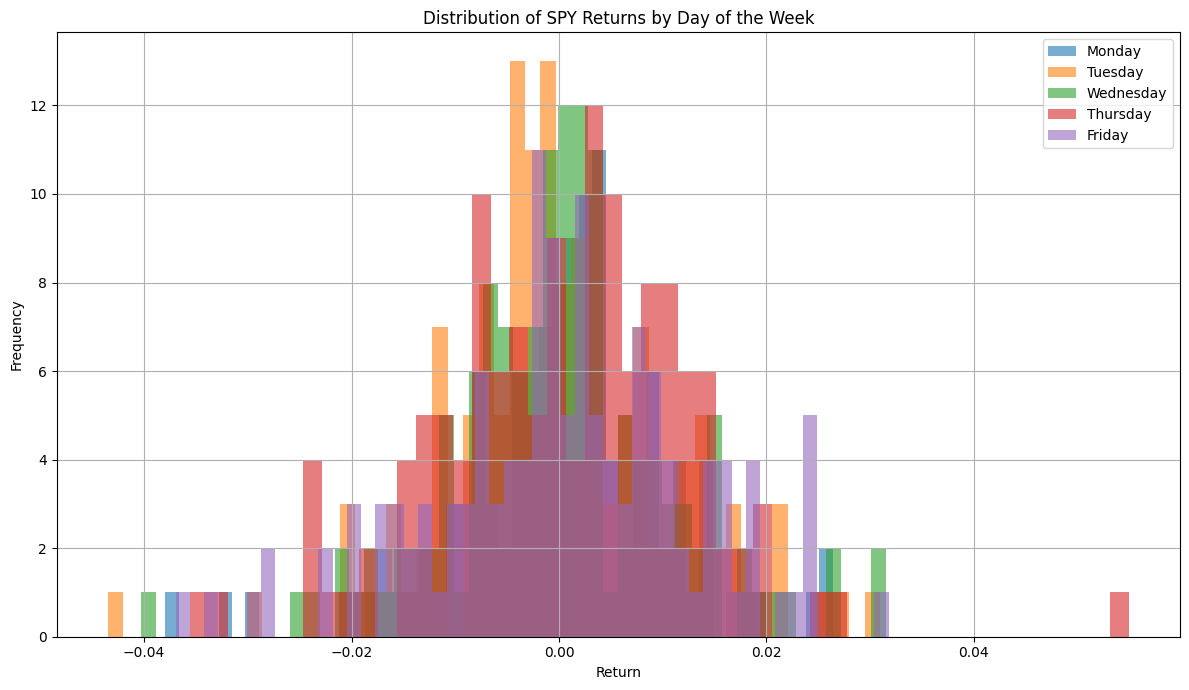

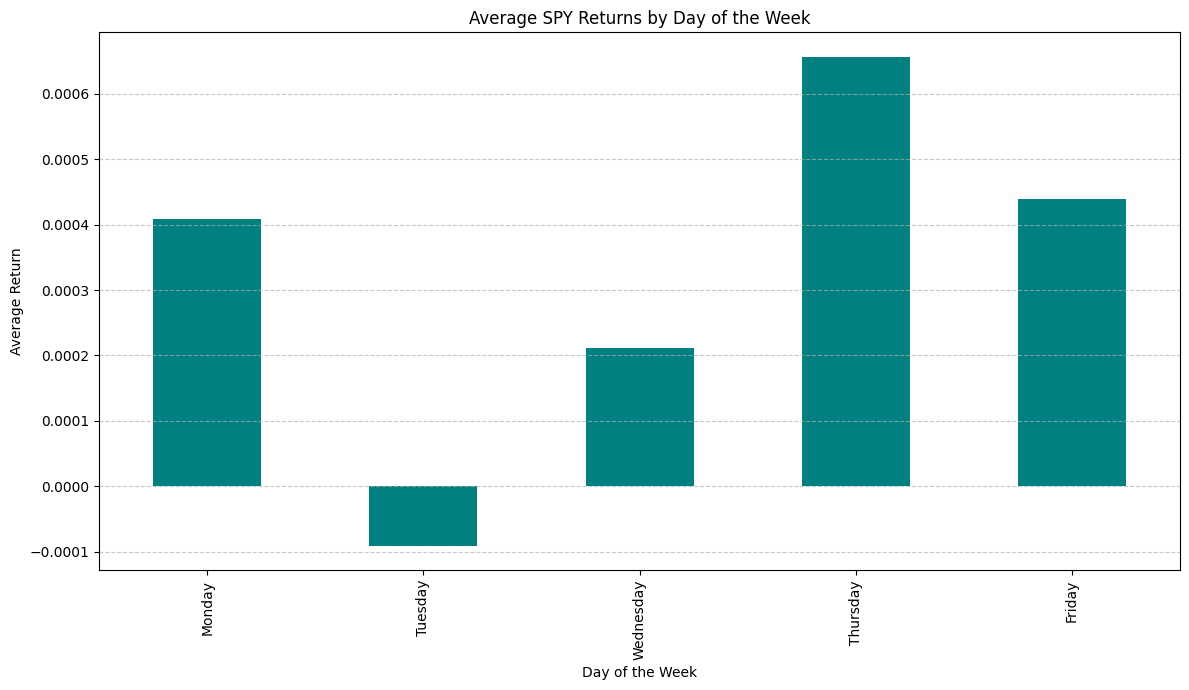

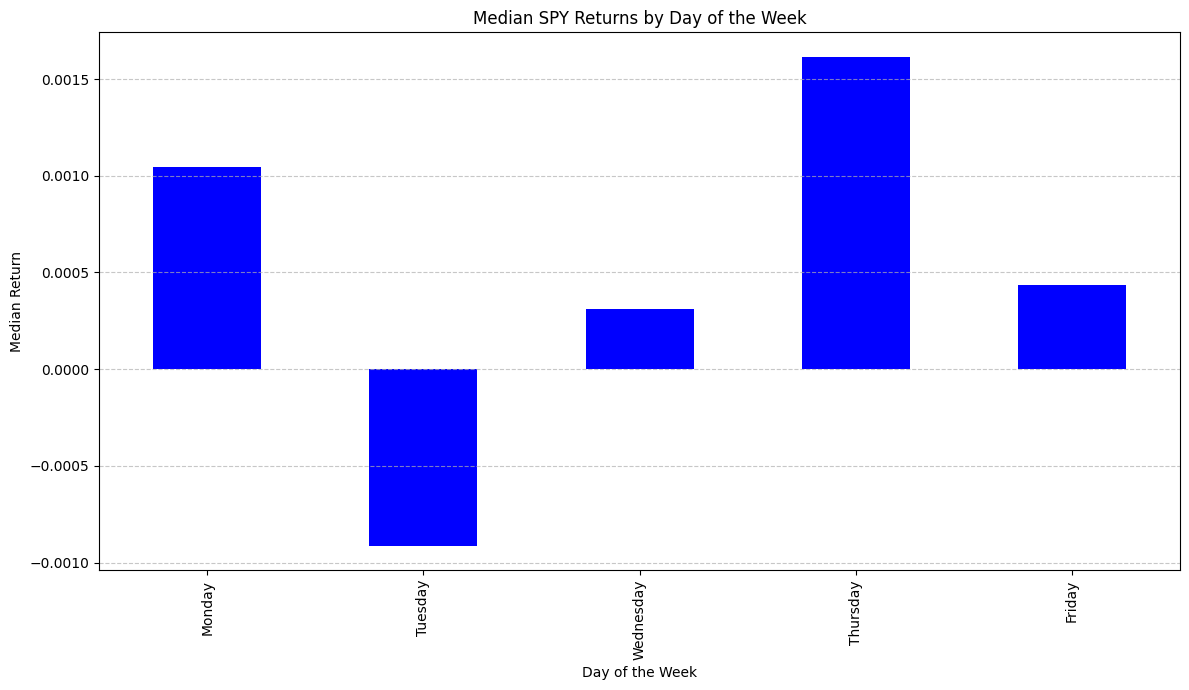

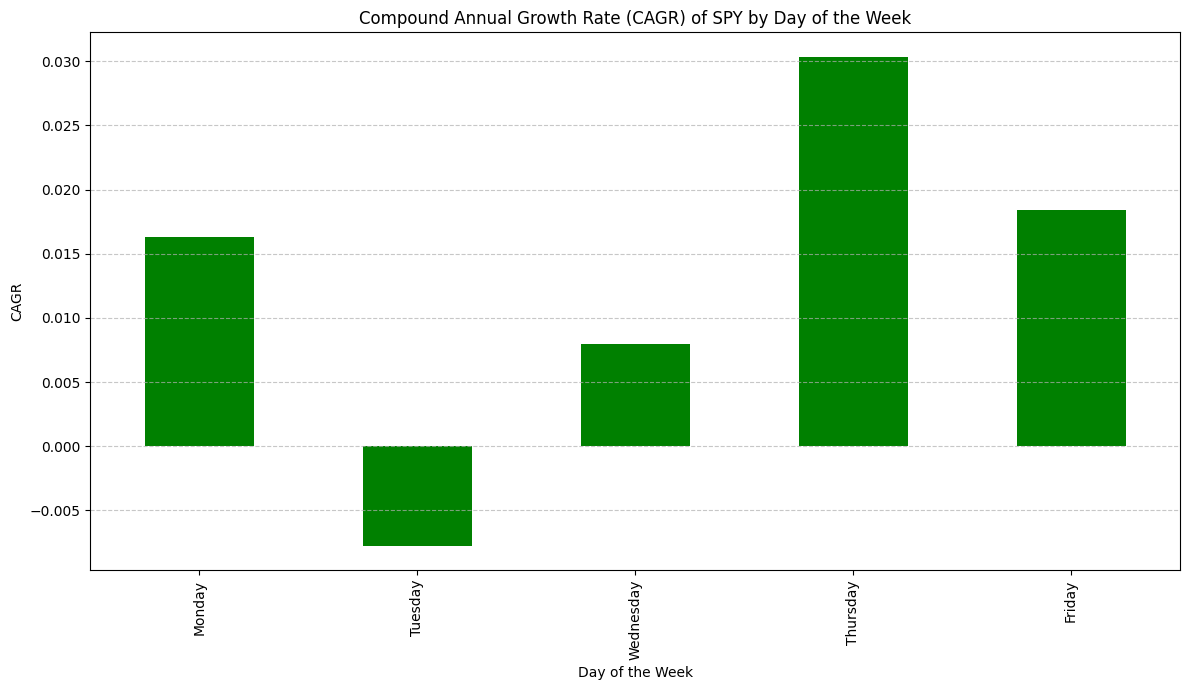

[*********************100%***********************]  1 of 1 completed


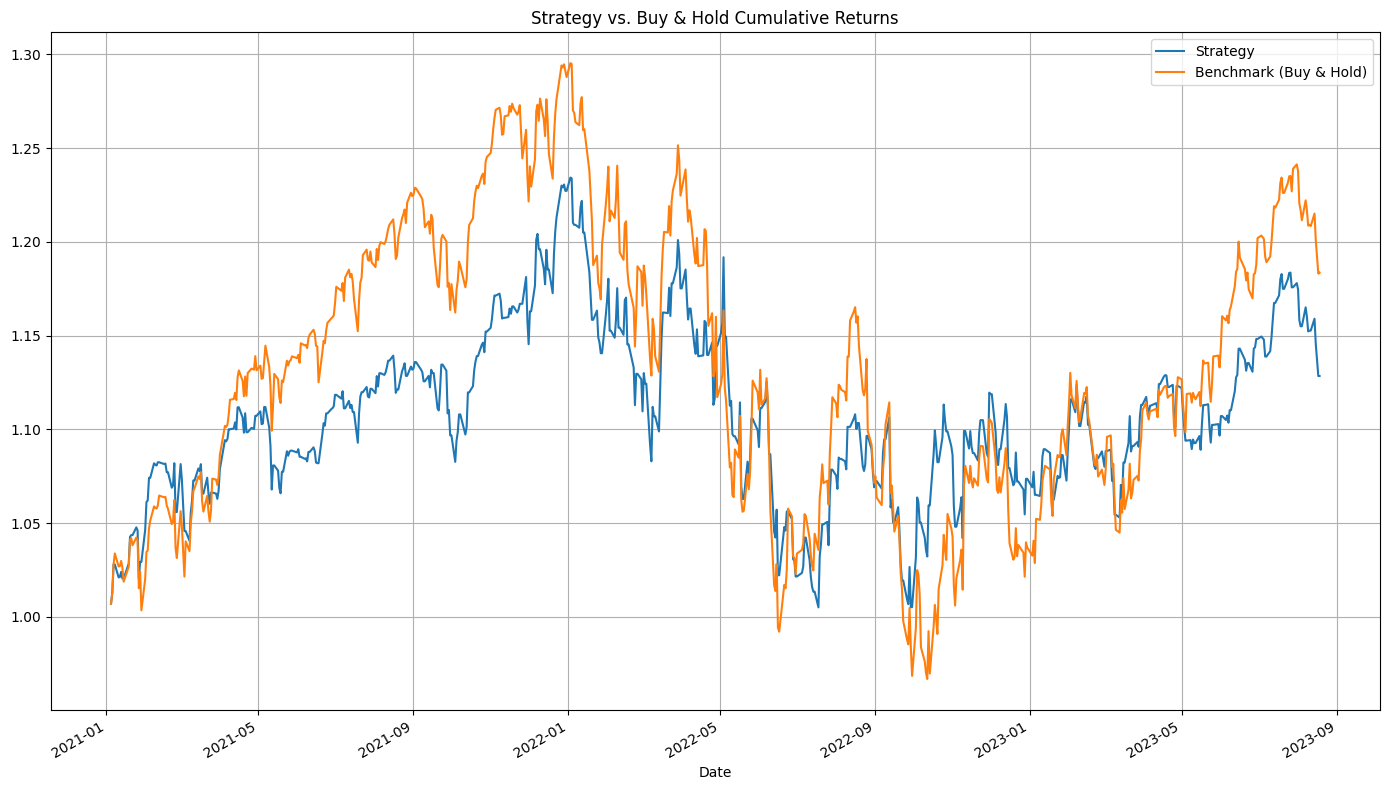

CAGR of Strategy: 4.72%
CAGR of Benchmark (Buy & Hold): 6.65%
Max Drawdown of Strategy: -18.57%
Max Drawdown of Benchmark (Buy & Hold): -25.36%
[*********************100%***********************]  1 of 1 completed


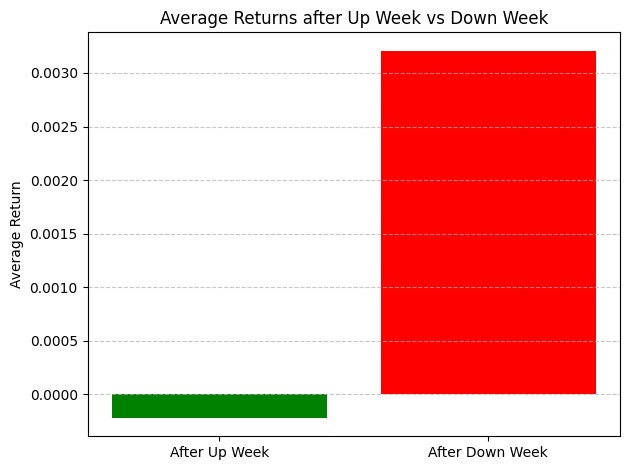

Average return after an Up Week: -0.02%
Average return after a Down Week: 0.32%
[*********************100%***********************]  1 of 1 completed


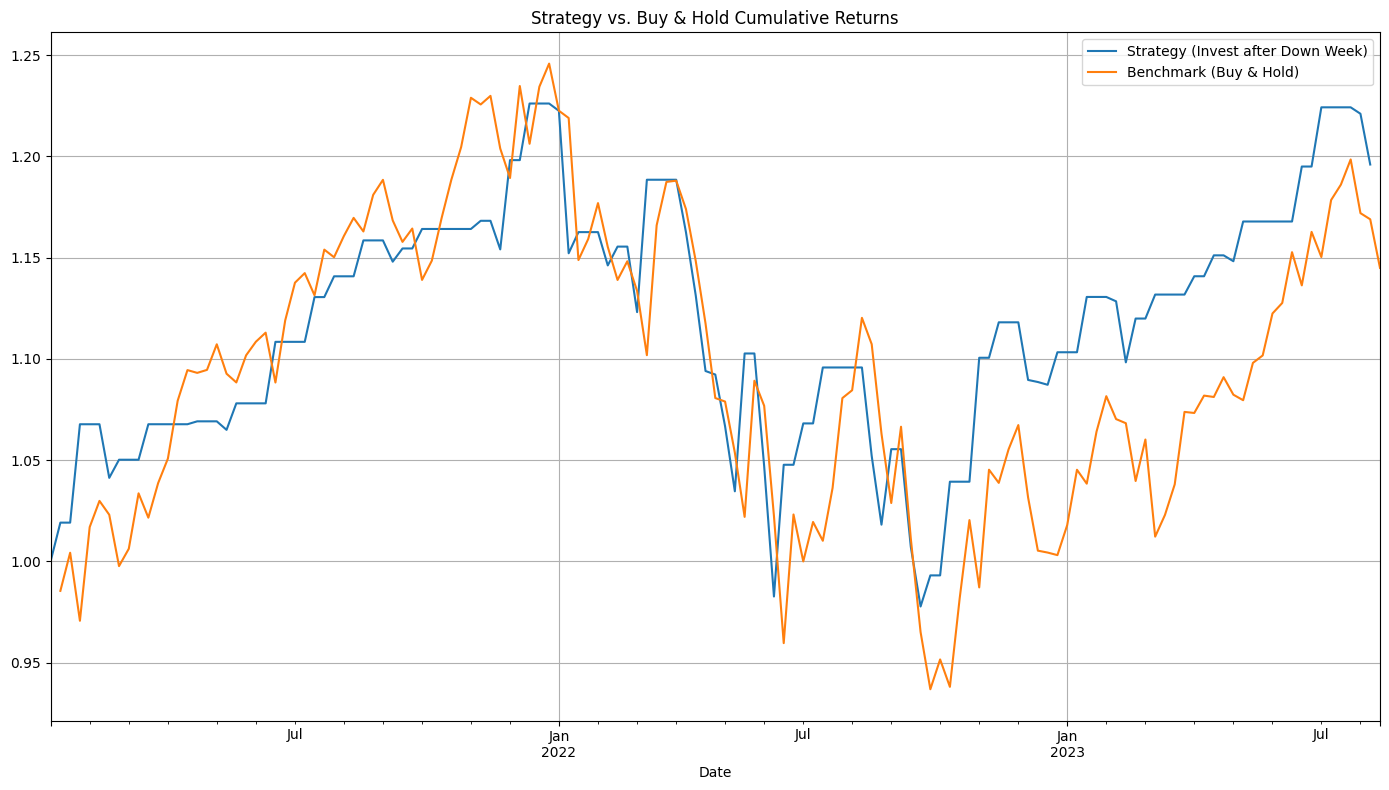

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Download SPY data
spy_data = yf.download('SPY',  start="2021-01-01")['Close'].to_frame()
# Calculate daily returns
spy_data['Return'] = spy_data['Close'].pct_change()
# Extract day of the week
spy_data['Day_of_Week'] = spy_data.index.day_name()
# Group by the day of the week and get a list of returns for each group
grouped = spy_data.groupby('Day_of_Week')['Return'].apply(list)

# Plotting
plt.figure(figsize=(12,7))
# List of weekdays in order
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
# Plot histograms for each weekday
for day in days:
    plt.hist(grouped[day], bins=50, label=day, alpha=0.6)

plt.title('Distribution of SPY Returns by Day of the Week')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the average return for each day of the week
avg_returns = spy_data.groupby('Day_of_Week')['Return'].mean()

# Reorder the index so that it follows the correct weekday order
avg_returns = avg_returns.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

# Plotting
plt.figure(figsize=(12,7))
avg_returns.plot(kind='bar', color='teal')
plt.title('Average SPY Returns by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Return')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate the median return for each day of the week
median_returns = spy_data.groupby('Day_of_Week')['Return'].median().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

# Calculate CAGR for each day of the week
years = (spy_data.index[-1] - spy_data.index[0]).days / 365.25
cagr_by_day = {}
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
    daily_returns = spy_data[spy_data['Day_of_Week'] == day]['Return']
    cagr_by_day[day] = (np.prod(1 + daily_returns))**(1 / years) - 1

cagr_by_day = pd.Series(cagr_by_day)

# Plotting Median Returns
plt.figure(figsize=(12,7))
median_returns.plot(kind='bar', color='blue')
plt.title('Median SPY Returns by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Median Return')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting CAGR
plt.figure(figsize=(12,7))
cagr_by_day.plot(kind='bar', color='green')
plt.title('Compound Annual Growth Rate (CAGR) of SPY by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('CAGR')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Download SPY data
spy_data = yf.download('SPY',  start="2021-01-01")['Close'].to_frame()
spy_data['Day_of_Week'] = spy_data.index.day_name()
spy_data['Daily_Return'] = spy_data['Close'].pct_change()

# Define strategy and benchmark returns
spy_data['Strategy_Return'] = np.where(spy_data['Day_of_Week'] != 'Friday', spy_data['Daily_Return'], 0)
spy_data['Cumulative_Strategy_Return'] = (spy_data['Strategy_Return'] + 1).cumprod()
spy_data['Cumulative_Benchmark_Return'] = (spy_data['Daily_Return'] + 1).cumprod()

# Plot Cumulative Returns
plt.figure(figsize=(14, 8))
spy_data['Cumulative_Strategy_Return'].plot(label='Strategy')
spy_data['Cumulative_Benchmark_Return'].plot(label='Benchmark (Buy & Hold)')
plt.title('Strategy vs. Buy & Hold Cumulative Returns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate CAGR for strategy and benchmark
years = (spy_data.index[-1] - spy_data.index[0]).days / 365.25
cagr_strategy = (spy_data['Cumulative_Strategy_Return'].iloc[-1])**(1/years) - 1
cagr_benchmark = (spy_data['Cumulative_Benchmark_Return'].iloc[-1])**(1/years) - 1

print(f"CAGR of Strategy: {cagr_strategy*100:.2f}%")
print(f"CAGR of Benchmark (Buy & Hold): {cagr_benchmark*100:.2f}%")

# Calculate Max Drawdown for strategy and benchmark
spy_data['Strategy_Peak'] = spy_data['Cumulative_Strategy_Return'].cummax()
spy_data['Strategy_Drawdown'] = spy_data['Cumulative_Strategy_Return'] / spy_data['Strategy_Peak'] - 1

spy_data['Benchmark_Peak'] = spy_data['Cumulative_Benchmark_Return'].cummax()
spy_data['Benchmark_Drawdown'] = spy_data['Cumulative_Benchmark_Return'] / spy_data['Benchmark_Peak'] - 1

max_drawdown_strategy = spy_data['Strategy_Drawdown'].min()
max_drawdown_benchmark = spy_data['Benchmark_Drawdown'].min()

print(f"Max Drawdown of Strategy: {max_drawdown_strategy*100:.2f}%")
print(f"Max Drawdown of Benchmark (Buy & Hold): {max_drawdown_benchmark*100:.2f}%")

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download SPY data
spy_data = yf.download('SPY',  start="2021-01-01")['Close'].resample('W-FRI').last().to_frame()
spy_data['Weekly_Return'] = spy_data['Close'].pct_change()

# Create flags for up and down weeks
spy_data['Up_Week'] = spy_data['Weekly_Return'] > 0
spy_data['Down_Week'] = spy_data['Weekly_Return'] <= 0

# Calculate returns after up weeks and down weeks
spy_data['Return_After_Up_Week'] = spy_data['Weekly_Return'].shift(-1).where(spy_data['Up_Week'])
spy_data['Return_After_Down_Week'] = spy_data['Weekly_Return'].shift(-1).where(spy_data['Down_Week'])

# Calculate average returns
avg_return_after_up = spy_data['Return_After_Up_Week'].mean()
avg_return_after_down = spy_data['Return_After_Down_Week'].mean()

# Plotting the average returns
plt.bar(['After Up Week', 'After Down Week'], [avg_return_after_up, avg_return_after_down], color=['green', 'red'])
plt.title('Average Returns after Up Week vs Down Week')
plt.ylabel('Average Return')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"Average return after an Up Week: {avg_return_after_up*100:.2f}%")
print(f"Average return after a Down Week: {avg_return_after_down*100:.2f}%")

# Download SPY data
spy_data = yf.download('SPY', start="2021-01-01")['Close'].resample('W-FRI').last().to_frame()
spy_data['Weekly_Return'] = spy_data['Close'].pct_change()

# Flag for down weeks
spy_data['Down_Week'] = spy_data['Weekly_Return'] <= 0

# Strategy: Invest only after a down week
spy_data['Strategy_Return'] = spy_data['Weekly_Return'].shift(-1).where(spy_data['Down_Week'], 0)
spy_data['Cumulative_Strategy_Return'] = (spy_data['Strategy_Return'] + 1).cumprod()

# Benchmark: Buy & Hold SPY
spy_data['Cumulative_Benchmark_Return'] = (spy_data['Weekly_Return'] + 1).cumprod()

# Plot Cumulative Returns
plt.figure(figsize=(14, 8))
spy_data['Cumulative_Strategy_Return'].plot(label='Strategy (Invest after Down Week)')
spy_data['Cumulative_Benchmark_Return'].plot(label='Benchmark (Buy & Hold)')
plt.title('Strategy vs. Buy & Hold Cumulative Returns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()